In [267]:
import os
from postProcessing.importData import *


#Insert name here
NAME = "test_4_c.h5"
#################
NAME = NAME.split("/")
if 'simulations' in NAME:
    NAME.remove("simulations")
    NAME="/".join(NAME)
if isinstance(NAME, list):
    NAME = "/".join(NAME)
NAME = NAME.split(".")
if "h5" in NAME:
    NAME.remove("h5")
    NAME=".".join(NAME)
if isinstance(NAME, list):
    NAME = ".".join(NAME)
    


PATH = "./simulations/" + NAME
if(os.path.isdir(NAME)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data = dataProcessing(PATH)
data.printHamiltonian()



b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.22987371683120728
q    ==>  0.699999988079071
Bext ==>  (0., 0., 0.)
Emax ==>  22.5
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.+0.j 1.+0.j]
mu   ==>  [0. 0.]
h    ==>  [0. 0.]
Coupling matrix V:
  3.2  -0.05  
-0.05    1.8  
Inverse of V:
  0.312636  0.00868433  
0.00868433    0.555797  
detV ==> 5.757499933168289


In [268]:
file_name = NAME

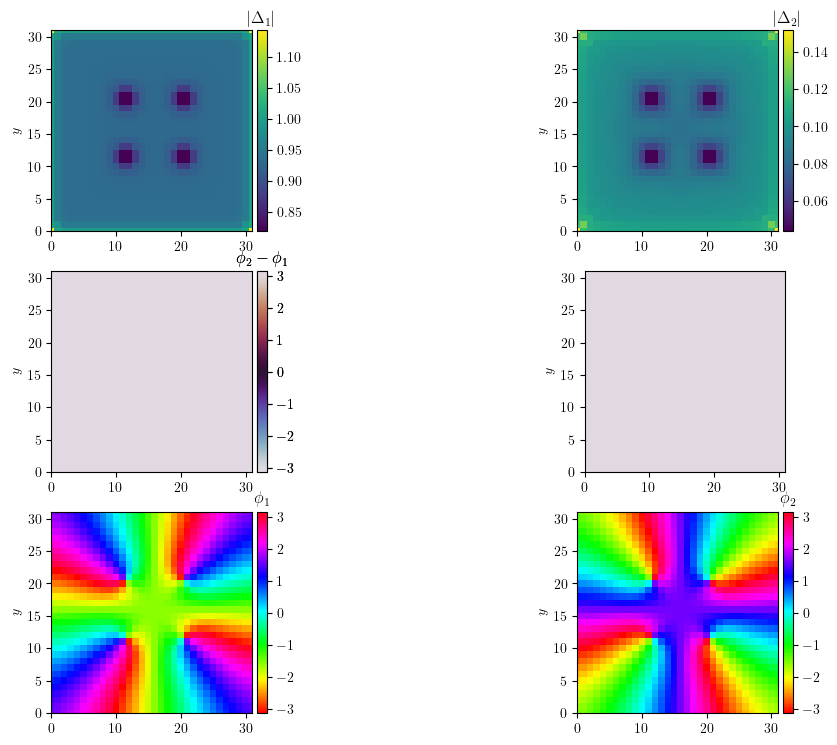

In [269]:
data.plotDelta(save=file_name+'delta')

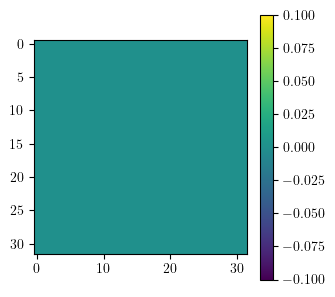

In [270]:
plt.imshow(data.mod/data.hamiltonian.Emax) 
plt.colorbar()
plt.savefig(file_name + 'mu.pdf')

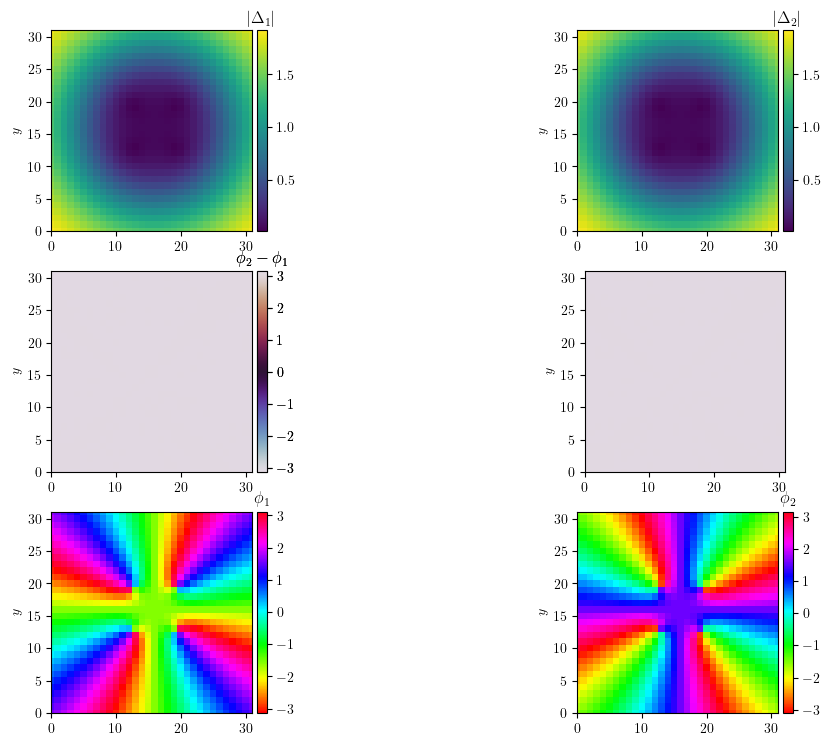

In [271]:
data.plotInitialGuess(save=file_name+'ig')

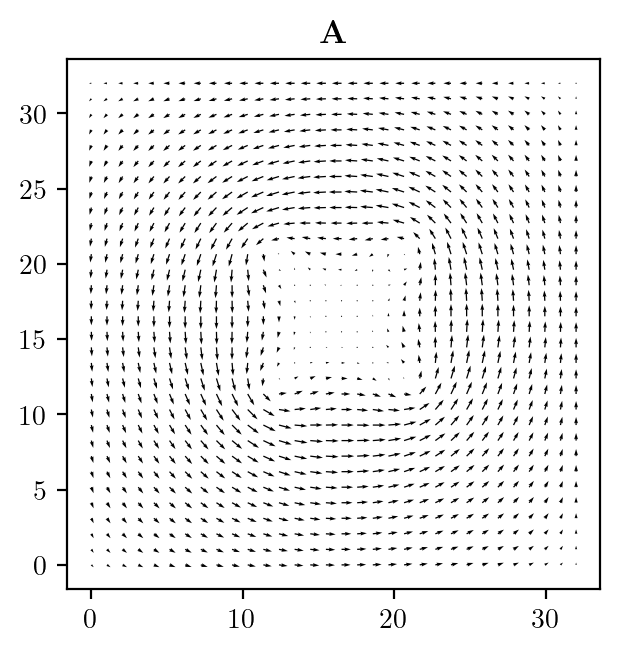

In [272]:
data.plotA()

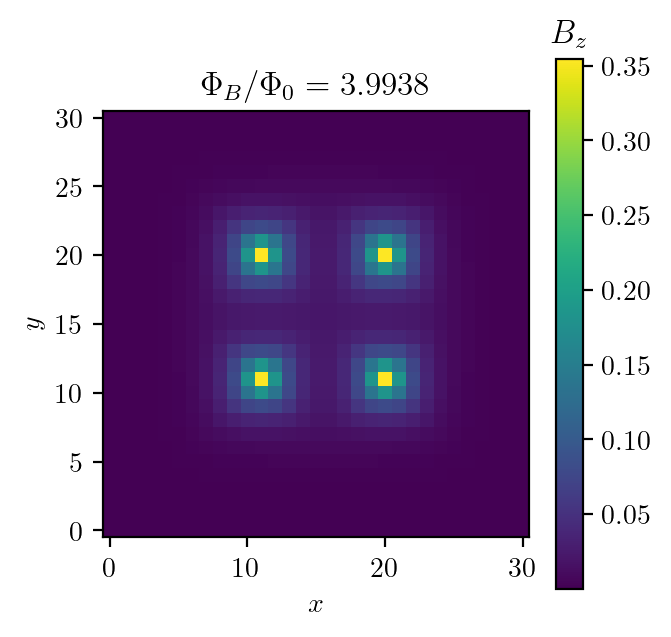

In [273]:
data.plotB(save=file_name+'B')

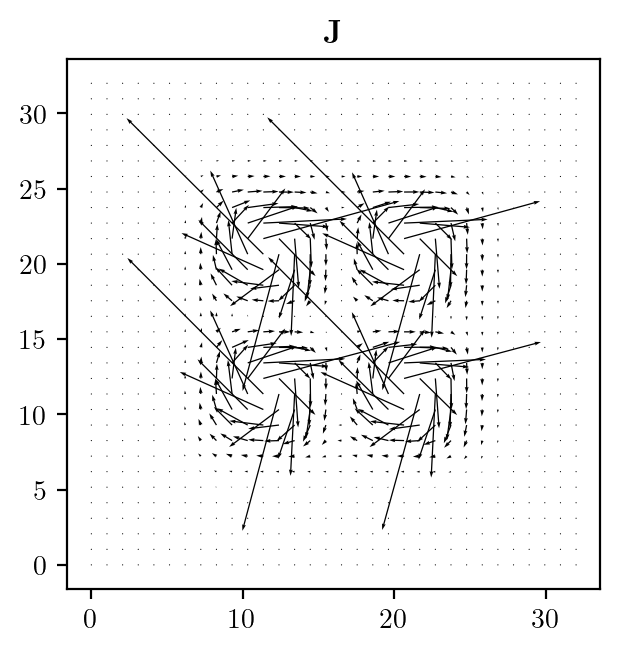

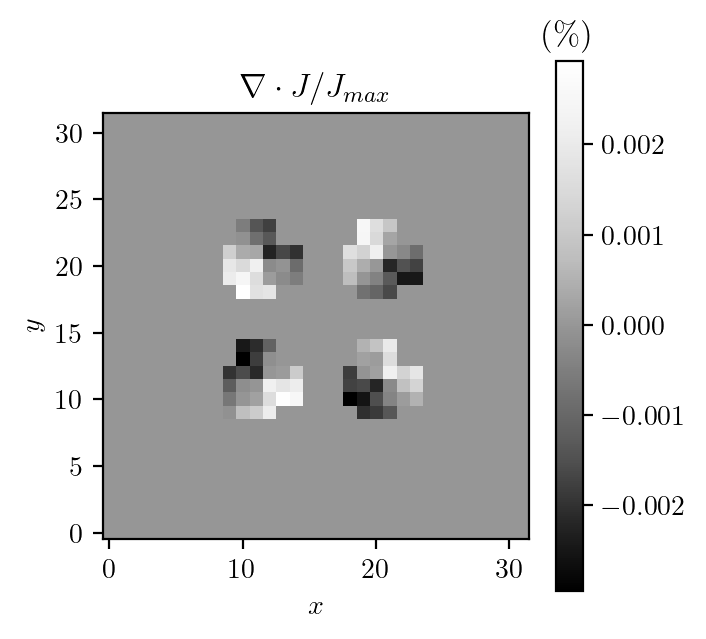

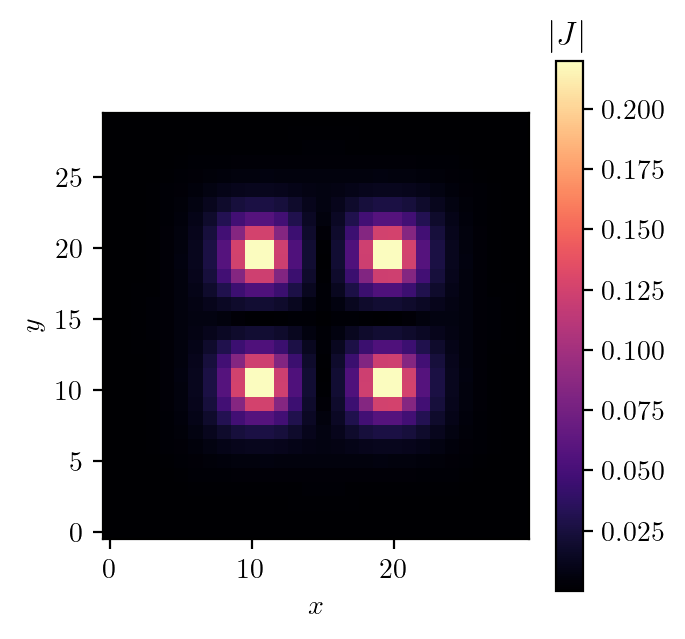

In [274]:
data.plotJ(0.002, save=file_name+'J')

In [275]:
data.FreeEnergy

-18079.001858072494